# The One-Hot Encoding Concept

Developed in the CADD seminars 2020, Volkamer Lab, Charité/FU Berlin 

Author : Sakshi Misra

## Aim of this talkatorial

The aim of the talkatorial is to perform One Hot Encoding on SMILES structures of ChEMBL dataset to gain a deeper understanding on One Hot Encoding Concept and why it is useful as a pre-processing step in various Machine Learning algorithm. 

<img src="./images/logo.png" width="300" align='center'>

## Learning goals


### Theory

* ChEMBL database
* SMILES structures
    - Some SMILES Specification Rules
* What is Categorical Data?
    - What is the Problem with Categorical Data?
    - How to Convert Categorical Data to Numerical Data?
* One Hot Encoding Concept
    - Why Use a One Hot Encoding?
    - Example of One Hot Encoding
    - Advantages of Using One Hot Encoding
    - Disadvantages of Using One Hot Encoding
* Other similar Transformation
    - Integer Encoding (Label Encoder)
    - Example of Label Encoding
* Differences between Label and One Hot Encoding
* Further Readings


###  Practical

* Import necessary packages
* Load and draw molecules
* Apply One Hot encoding using own implementation
  - Visualization of One Hot Encoded Matrix using Own Implementation (unequal dimension)
* Function defined to preprocess the Data
* Apply One Hot encoding using Own implementation on Preprocessed Data
  - Visualization of One Hot Encoded Matrix using Own Implementation (equal dimension)
* Apply One Hot encoding using implementation in [Scikit-learn](https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
   - Without Padding
     - Visualization using Scikit-learn implementation
   - Padding after One Hot Encoding performed
      - Visualization using Scikit-learn implementation
   - Padding before One Hot Encoding performed
      - Visualization using Scikit-learn implementation
* Apply One Hot encoding using implementation in [keras](https://keras.io/)
  - Without Padding
     - Visualization of One Hot Encoded Matrix using keras implementation
  - With Padding
     - Visualization of One Hot Encoded Matrix using keras implementation


## References

- Theoretical Background:
     - ChEMBL database (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3965067/)
     - Example using OneHotEncoder function from Scikit Learn (https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)
     

- Packages used:
     - [rdkit](https://www.rdkit.org/docs/GettingStartedInPython.html)
     - [Scikit-learn](https://scikit-learn.org/stable/)
     - [keras](https://keras.io/)
     - [Matplotlib](https://matplotlib.org/)
     - [timeit](https://docs.python.org/3/library/timeit.html)
     
- Smiles Encoder function used (https://iwatobipen.wordpress.com/2017/01/22/encode-and-decode-smiles-strings/)

- Images used:
     - Figure 1- Categorical Encoding (https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)
     - Figure 2- One Hot Encoding of SMILES(https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2523-5)
     - Figure 3- One hot Encoding example (https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39)
     - Figure 4- Label encoding example  (https://towardsdatascience.com/know-about-categorical-encoding-even-new-ones-c266227b9cbd)



## Theory

### ChEMBL database

- [ChEMBL](https://www.ebi.ac.uk/chembl/) is an open large-scale bioactivity database. 
- It is a database having molecules with drug-like properties. 
- Recent release 17 contains information extracted from  more than 51,000 publications, together with bioactivity   data sets from 18 other sources (depositors and databases). In total, there are now more than 1.3 million distinct compound structures and 12 million bioactivity data points.
- It is maintained by [European Bioinformatics Institute](https://en.wikipedia.org/wiki/European_Bioinformatics_Institute).


### SMILES structures
- [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) (Simplified Molecular Input Line Entry System) notation is a chemical notation that allows a user to represent a chemical structure of a molecule in a linear way that can be used by the computer.
- SMILES contains a chain of letters, number and characters that specify the atoms, their connectivity , their bond order and chirality.

 > ### Some SMILES Specification Rules
    - **Atoms** - are represented by their atomic symbols. Also metal atoms are represented with symbols in square bracket, for eg. Gold `[Au]`.
    - **Bonds** - Single, Double and Triple bonds are represented by symbols `-`, `=` and `#` respectively.Aromatic bonds are represented by `*`. Single bonds are the default and therefore need not be entered. Aromatic C,O,S and N atoms are shown in lower case like 'c', 'o', 's' and 'n' or by symbo ':' whereas Aliphatic C,O,S and N atoms are shown in upper case. For example, 'CC' would mean that there is a non-aromatic carbon attached to another non-aromatic carbon by a single bond, and the computer would identify the structure as the chemical Ethane (`CH3CH3`).
    - **Rings** - SMILES allows a user to identify ring structures by using numbers to identify the opening and closing ring atom. For example, in `C1CCCCC1`, the first carbon has a number '1' which connects by a single bond with the last carbon which also has a number '1'. The resulting structure is cyclohexane
    - **Branches** - are specified by enclosing them in parentheses, and can be nested or arranged. For Eg. 2-Propanol is represented by CC(O)C.



--- 

### What is Categorical Data?
Categorical data are variables that contain label values rather than numeric values.
Some examples include:

- A “pet” variable with the values: “dog” and “cat“.
- A “color” variable with the values: “red“, “green” and “blue“.
- A “place” variable with the values: “first”, “second” and “third“.

Talking about in terms of bioinformatics, if we are using Machine learning Classifier to classify Cancerous and Normal Tissues cells, we can have label values say "Lung Cancer", "Breast Cancer", "Liver Cancer" and "Healthy Controls".
We first need to One Hot Encode these Categorical label values and then we can apply Binary or Multi-Class Classifier to achieve classification results.


> ### What is the Problem with Categorical Data?
Machine Learning is, after all, a bunch of mathematical operations translated to a computer via low-level programming languages.Computers are brilliant when dealing with numbers. So, we must somehow convert our input data to numbers. 
There are many machine learning algorithms which cannot operate on categorical data directly so they must be converted to a numerical form so all our input variables and output variables will be numeric.

<div style="text-align: center;">
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/external-content.duckduckgo.com_.jpeg" alt="Drawing" style="max-width: 500px; width:400%;"/>
</div>

**Figure 1** displays the Categorical Encoding requires for our computers to understand the input.

> ### How to Convert Categorical Data to Numerical Data?
There are many ways to convert categorical values into numerical values.Each approach has its own positive and negative impact on the feature set. Hereby, I would be focusing on 2 main methods: `One-Hot-Encoding` and `Label-Encoder`.
Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

---

### One Hot Encoding Concept
One hot encoding is a vector representation where all the elements of the vector are 0 except one, which has 1 as its value. For example, [0 0 0 1 0 0] is a one-hot vector.
Simply, One hot encoding also known as Binary encoding, is a binary representation of categorical variables as binary vectors.



<div style="text-align: center;">
    <img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12859-018-2523-5/MediaObjects/12859_2018_2523_Fig1_HTML.png?as=webp" style="max-width: 500px; width:400%;" />
</div>



**Figure 2a** shows the One Hot Encoding of four DNA nucleotides, a filter kernel with one-dimensional CNN and 
**Figure 2b** shows One Hot Encoding of Toluene and applying one-dimensional CNN to SMILES linear representations of chemical compound Toluene.

Lets take a deeper look into the concept with the help of a simple example that will describe the basic concept of One Hot Encoding, why it is useful and how one can approach towards it.

> ### Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive.
Its difficult for many machine learning algorithms to work with categorical data directly that's why the label values which are categorical must be converted into numbers first as a preprocessing step. This is required for both input and output variables that are categorical.
We could use an integer encoding directly. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.
There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat


> ### Example of One Hot Encoding
Lets take a look at a very simple example to understand this concept.
Lets assume we have the “color” variable which has three labels, `RED` , `BLUE` and `GREEN`.
All these labels must be converted into numeric form in order to work with our Machine Learning algorithm, this can be done by creating three new columns having all the three labels and use “1” value for the color and “0” values for the other colors as shown in Figure 3.


<div style="text-align: center;">
    <img src="images/OneHotEncoding_eg.png" style="max-width: 700px; width:150%;" />
</div>

**Figure 3** shows the visual demonstration of One Hot Encoding done on Color Variable.




> ###  Advantages of Using One Hot Encoding 
-  If the cardinality (the number of categories) of the categorical features is low (relative to the amount of data) one-hot encoding will work best. We can use it as input into any Machine Learning model.
-  We can create binary representation of our label values which can be useful for binary classification.


> ###  Disadvantages of Using One Hot Encoding 
-  Increase in dimensionality, after adding several columns based on categorical variables, the dataset will be having more dimensions than before and in result it can increase the computational cost.
- There is a high chances of multicollinearity due to dummy variables which can affect the performance of our Model.
-  Increase [Sparsity](https://en.wikipedia.org/wiki/Sparse_matrix) (sparse array is a matrix in which most of the elements are zero, One Hot Encoding can result in increasing the sparsity of our dataset)


---

### Other similar Transformation

### Integer Encoding (Label Encoder)

This is called a label encoding or an integer encoding and is easily reversible.
[Label Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is also a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering, so that machines can work with it properly.
Machine learning algorithms can then decide in a better way on how labels must be operated. 
It is an important preprocessing step for the structured dataset in supervised learning.

> ### Example of Label Encoding
Lets take a similar example as above, we have a color variable and we can assign “red” as 0, “green” as 1, and “blue” as 2 as shown in Figure 4.


![OneHotEncoding Example](images/label_encoding_example.png)

**Figure 4** shows the visual demonstration of Label Encoding of Color variable.


---


### Difference between Label and One Hot Encoding

There is not much difference between these two encoding techniques, its mainly depends on the type of data and model we are using. For example if we have categorical features which are not ordinal (dog or cat) then we can use One Hot Encoding. Label encoding works best with ordinal data like Good=0, Better=1, Best=2.
Also when there are more categorical variables then its good to choose Label Encoding just to avoid high memory consumption and Sparsity.



--- 

### Further Readings

This section lists some resources for further reading

- [What is one hot encoding and when is it used in data science?](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science)
- [Categorical encoding using Label-Encoding and One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd#:~:text=One%2DHot%20Encoding%20in%20Python&text=OneHotEncoder%20from%20SciKit%20library%20only,apply%20OneHotEncoder%20on%20column%20Bridge_Types_Cat.)
- [Research Article: Convolutional neural network based on SMILES representation of compounds for detecting chemical motif](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2523-5)
- [How one can use matplotlib.pyplot.imshow() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/)

## Practical

### Imports

In [1]:
# Importing all the necessary libraries
from pathlib import Path
import pandas as pd
import numpy as np
from timeit import default_timer as timer
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
print('All packages are installed successfully')

All packages are installed successfully


### Load and draw molecules

Using `Pandas` library, we will first load the data and then we can draw the molecules using `rdkit.draw` function.
Finally we can apply different implementations of `One Hot Encoding` into the SMILES structures.

Let's load the data and quickly analyze its column values and also to check if there is any missing values:

In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [3]:
df = pd.read_csv('DATA/CHEMBL25_activities_EGFR.csv',
                 lineterminator='\n', index_col=0) # NBVAL_CHECK_OUTPUT

In [4]:
# Command used to remove warnings
pd.options.mode.chained_assignment = None

In [5]:
# Check the dimension of the data
print("Shape of dataframe : ", df.shape) # NBVAL_CHECK_OUTPUT

Shape of dataframe :  (3906, 5)


In [6]:
# Check for any missing values
df.info() # NBVAL_CHECK_OUTPUT

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3906 entries, 1777 to 2783
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         3906 non-null   object 
 1   IC50              3906 non-null   float64
 2   units             3906 non-null   object 
 3   canonical_smiles  3906 non-null   object 
            3906 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.1+ KB


In [7]:
# Visualizing the dataframe
df.head() # TODO:CI

,chembl_id,IC50,units,canonical_smiles,pIC50\r
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


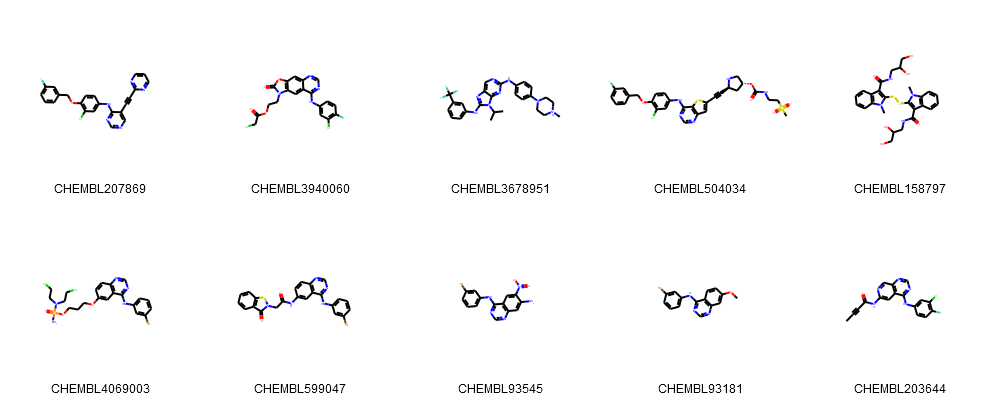

In [8]:
# Using pandas tools and Draw method we can visualize our molecules
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='canonical_smiles')
Draw.MolsToGridImage(list(df.ROMol[0:10]),
                     legends=list(df.chembl_id[0:20]), molsPerRow=5) # NBVAL_CHECK_OUTPUT

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,

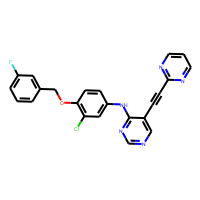
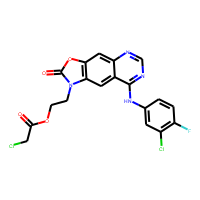
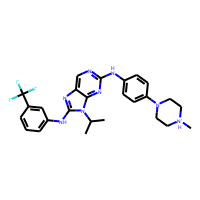
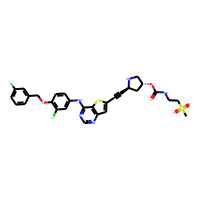
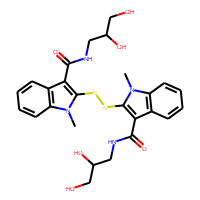

In [9]:
# Renaming column name ROMol to 2D_Figure to get the proper idea of the column
df = df.rename(columns={'ROMol': '2D_Figures'})
df.head() # NBVAL_CHECK_OUTPUT

### Apply One Hot encoding using own implementation

Now we can define our own function which will be useful to create One Hot Encoded Matrix of our SMILES strings.

In [10]:
# Creating a new column for Encoded values of smiles
df['Own_OneHotEncoding'] = ""

In [11]:
# Create dataset of all possible Smiles Characters
SMILES_CHARS = [' ', '#', '%', '(',
                ')', '+', '-', '.', '/', '0', '1', '2', '3',
                '4', '5', '6', '7', '8', '9',
                '=', '@', 'A', 'B', 'C', 'F', 'H', 'I', 'K', 'L', 'M',
                'N', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Z',
                '[', '\\', ']', 'a', 'b', 'c', 'e', 'g', 'i',
                'l', 'n', 'o', 'p', 'r', 's', 't', 'u']
# Convert the dataset into dictionary
smi2index = dict((c, i)for i, c in enumerate(SMILES_CHARS))


# Function defined to create One Hot Encoded Matrix
def smiles_encoder(smiles, length):
    """Function defined to One Hot Encode SMILES strings
       using all possible 56 characters defined
    Parameters
    ----------
          smiles(string): SMILES strings
          length(int): length of the SMILE string
    Returns
    -------
          ndarray: return One Hot Encoded matrix
    """
    smilesMatrix = np.zeros((len(SMILES_CHARS), length), dtype=int)
    for i, c in enumerate(smiles, 0):
        smilesMatrix[smi2index[c], i] = 1
    return smilesMatrix

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."

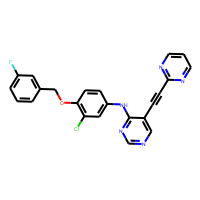
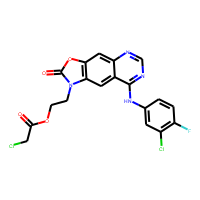
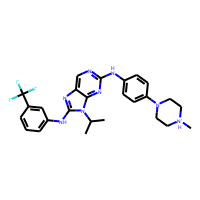
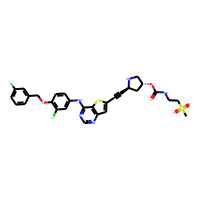
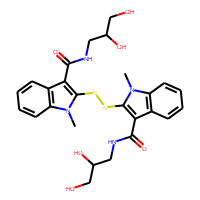

In [12]:
# Iterate over all the smiles in the df and
# apply the  function
start = timer()
for i in range(0, 3906):
    strings = df['canonical_smiles'].iloc[i]
    df['Own_OneHotEncoding'].iloc[i] = smiles_encoder(strings, len(strings))
end = timer()
df.head() # NBVAL_CHECK_OUTPUT

In [13]:
# Print time required for execution
smiles_encoder_Time = end - start
print(str(smiles_encoder_Time) + ' secs') # NBVAL_CHECK_OUTPUT

0.6736158999999997 secs


#### Visualization with Matplotlib.imshow() function

`Matplotlib` is a plotting library for the Python programming language and its numerical mathematics extension NumPy. `Pyplot` is a state-based interface to a Matplotlib module which provides a MATLAB-like interface.
The [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D space.

Now we can visualize our One Hot encoded strings using imshow() function as described above.

In [14]:
# First element's One Hot Encoded Matrix
First_OneHotEncoded_matrix1 = df.iloc[0]['Own_OneHotEncoding']

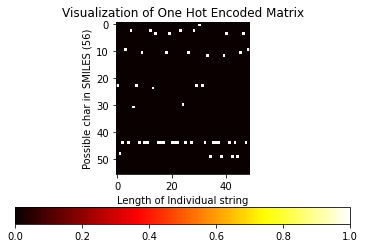

In [15]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_OneHotEncoded_matrix1, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Length of Individual string')
plt.ylabel('Possible char in SMILES (56)')
plt.title('Visualization of One Hot Encoded Matrix')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [16]:
# Check the 'type' of matrix array
type(First_OneHotEncoded_matrix1) # NBVAL_CHECK_OUTPUT

numpy.ndarray

In [17]:
# Dimension of the First_one_hot_encoded_matrix
First_OneHotEncoded_matrix1.shape # NBVAL_CHECK_OUTPUT

(56, 49)

In [18]:
# Another One Hot Encoded Matrix
Next_OneHotEncoded_matrix2 = df.iloc[1]['Own_OneHotEncoding']

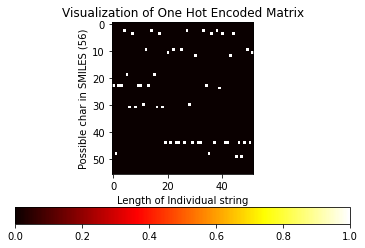

In [19]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(Next_OneHotEncoded_matrix2, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Length of Individual string')
plt.ylabel('Possible char in SMILES (56)')
plt.title('Visualization of One Hot Encoded Matrix')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [20]:
# Dimension of the Second OneHotEncoded_matrix
Next_OneHotEncoded_matrix2.shape # NBVAL_CHECK_OUTPUT

(56, 52)

- As we have noticed from above visualizations, that all the SMILES strings have unequal dimension because it calculates the individual string length, but its better to make the dimension equal for all the SMILES strings for better performance of ML models. In order to achieve this first, we searched for the string with Max Length using [len()](https://www.geeksforgeeks.org/python-string-length-len/) method.
- By implementing the above method, we can get the max length of the SMILES strings and pass that an argument in our function for all the strings.

-----

- Second, in the above function, we have created a dataset of 56 possible smiles characters, but to optimize our one hot encoding, we  reconsidered using all the 56 characters.
- We can assume that all the characters won't be present in our SMILES structures, so we looked for all the unique characters present in the SMILES.

------
- Third, I would like to point out that many elements in our periodic table have two alphabets in their name for example 'Cl(Chloride)' and thats commonly present in our SMILES structure but if we use the above `smiles_encoder` function then we will be splitting Cl into two characters 'C' and 'l' and that would lead to discrepancies, so searching this way for each unique characters and encoding them may not be the best possible way.
- Hence, we tried searching for all the two alphabetic element in our SMILES by comparing the atoms present in our strings with all the possible elements present in the periodic table and replaced all the two alphabetic elements with one character, for example 'Cl' changed to 'L'.

### Function defined to Preprocess the Data

In [21]:
# Create function used to preprocessed the data
def Preprocessing_Data(df):
    """Function defined which is used to preprocess the SMILES structures.
    Parameters
    -----------
         df: dataframe which requires preprocessing
    Returns
    --------
         df: dataframe with new Processed_canonical_smiles column
         unique_char: unique character list
         max_len: maximum length of strings of canonical_smiles column
    """
# Calculate max length of the SMILES strings
    max_len = df["canonical_smiles"].str.len().max()
# Search for unique characters in our SMILES strings
    unique_char = set(df.canonical_smiles.apply(list).sum())
    upper_chars = ['C', 'O', 'F', 'P', 'N', 'S', 'H', 'B', 'I']
    lower_chars = ['l', 'o', 'r', 'n', 'e', 'c', 's']
# List of all possible periodic elements
    Periodic_Elements = ['Ac',
                         'Al', 'Am', 'Sb', 'Ar', 'As', 'At', 'Ba',
                         'Bk', 'Be', 'Bi', 'Bh', 'B', 'Br', 'Cd', 'Ca',
                         'Cf', 'C', 'Ce', 'Cs', 'Cl', 'Cr', 'Co', 'Cn',
                         'Cu', 'Cm', 'Ds', 'Db', 'Dy', 'Es', 'Er', 'Eu',
                         'Fm', 'Fl', 'F', 'Fr', 'Gd', 'Ga', 'Ge', 'Au',
                         'Hf', 'Hs', 'He', 'Ho', 'H', 'In', 'I', 'Ir',
                         'Fe', 'Kr', 'La', 'Lr', 'Pb', 'Li', 'Lv',
                         'Lu', 'Mg', 'Mn', 'Mt', 'Md', 'Hg', 'Mo',
                         'Mc', 'Nd', 'Ne', 'Np', 'Ni', 'Nh', 'Nb',
                         'N', 'No', 'Og', 'Os', 'O', 'Pd', 'P',
                         'Pt', 'Pu', 'Po', 'K', 'Pr', 'Pm', 'Pa',
                         'Ra', 'Rn', 'Re', 'Rh', 'Rg', 'Rb', 'Ru', 'Rf',
                         'Sm', 'Sc', 'Sg', 'Se', 'Si', 'Ag', 'Na',
                         'Sr', 'S', 'Ta', 'Tc', 'Te', 'Ts', 'Tb', 'Tl', 'Th',
                         'Tm', 'Sn',
                         'Ti', 'W', 'U', 'V', 'Xe', 'Yb', 'Y', 'Zn', 'Zr']
# 'TwoCharcElements' is a list that contains 2 letter elements
# which are valid when compared with all the possible Periodic Elements.
    TwoCharcElements = []
    for upper in upper_chars:
        for lower in lower_chars:
            ch = upper + lower
            if(ch in Periodic_Elements):
                TwoCharcElements.append(ch)
# 'TwoCharElementsSmiles' is a set that contains all the possible 2 letter elem
# in our SMILES strings, that is *specific* to our dataset.
    TwoCharElementsSmiles = set()
    for x in TwoCharcElements:
        for i in range(0, 3906):
            if(df['canonical_smiles'].iloc[i].find(x) != -1):
                TwoCharElementsSmiles.add(x)
# Create a new column having processed canonical SMILES
    df['Processed_canonical_smiles'] = ""
# Replaced all the two letter elements found (Cl, Br, Cn, Se, @@) with one char
    for i in range(0, 3906):
        element = df['canonical_smiles'].iloc[i]
        element = element.replace("Cl", "L")
        element = element.replace("Br", "R")
        element = element.replace("Cn", "X")
        element = element.replace("Se", "Z")
        element = element.replace("@@", "$")
        df['Processed_canonical_smiles'].iloc[i] = element
    unique_char = set(df.Processed_canonical_smiles.apply(list).sum())
    return unique_char, df, max_len

**Note:** This function is highly specific to the above dataset used, because we have replaced 2 letter elements that are particularly found in the used dataset. One can add more 2 letter elements present in their specific SMILES.

### Apply One Hot encoding using Own implementation on Preprocessed Data

Now we have used the same function 'smiles_encoder' but on processed canonical strings.


In [22]:
# Create new column which has one hot encoded smiles using unique characters
df['UniqueChar_OneHotEncoding'] = ""
# Calling function
unique_char, df, max_len = Preprocessing_Data(df)

In [23]:
print(unique_char) # NBVAL_CHECK_OUTPUT

{'O', 's', 'Z', '0', '5', 'C', 'I', 'F', '(', 'R', 'P', '+', '2', '=', 'n', '4', 'o', 'B', 'S', '$', ']', 'L', '1', '\\', 'H', 'c', '@', '/', '-', 'X', '7', '3', '#', 'N', ')', '[', '6'}


In [24]:
# Create dictionary of the unique char datset
smi2index = dict((c, i) for i, c in enumerate(unique_char))


# Function defined to create One Hot Encoded Matrix
def smiles_encoder(smiles, maxlen):
    """Function defined using all unique characters in our
       Processed Canonical Smiles structures created
       from preprocessed function.
    Parameters
    ----------
        smiles(string): smile data in string
        maxlen(int): max length of the SMILES string
    Returns
    -------
        ndarray: return One Hot Encoded matrix with fixed dimension
    """
    smilesMatrix = np.zeros((len(unique_char), maxlen))
    for i, c in enumerate(smiles, 0):
        smilesMatrix[smi2index[c], i] = 1
    return smilesMatrix

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...

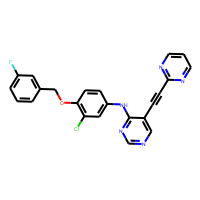
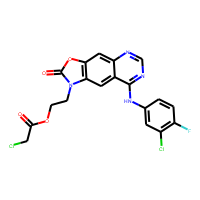
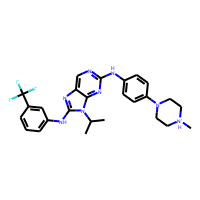
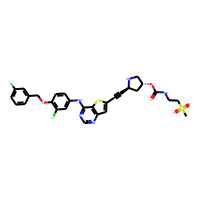
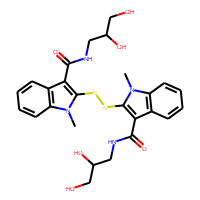

In [25]:
# Iterate over all the smiles in the dataframe
# and apply the  function
start = timer()
for i in range(0, 3906):
    strings = df['Processed_canonical_smiles'].iloc[i]
    df['UniqueChar_OneHotEncoding'].iloc[i] = smiles_encoder(strings, max_len)
end = timer()
df.head() # NBVAL_CHECK_OUTPUT

In [26]:
# Print time required for execution
smiles_encoder_eqDimen = end - start
print(str(smiles_encoder_eqDimen) + ' secs') # NBVAL_CHECK_OUTPUT

0.8050859000000017 secs


#### Visualization with Matplotlib.imshow() function

In [27]:
# First One Hot Encoded Matrix
First_OneHotEncoded_matrix3 = df.iloc[0]['UniqueChar_OneHotEncoding']

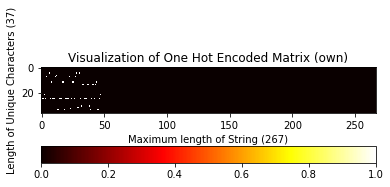

In [28]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_OneHotEncoded_matrix3, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Length of Unique Characters (37)')
plt.title('Visualization of One Hot Encoded Matrix (own)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [29]:
# Dimension of the First OneHotEncoded_matrix
First_OneHotEncoded_matrix3.shape # NBVAL_CHECK_OUTPUT

(37, 267)

In [30]:
# Another One Hot Encoded Matrix
Next_OneHotEncoded_matrix4 = df.iloc[1]['UniqueChar_OneHotEncoding']

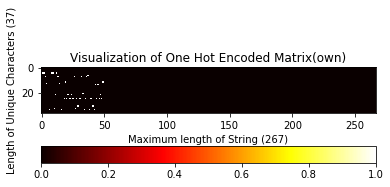

In [31]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(Next_OneHotEncoded_matrix4, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Length of Unique Characters (37)')
plt.title('Visualization of One Hot Encoded Matrix(own)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [32]:
# Dimension of the Second OneHotEncoded_matrix
Next_OneHotEncoded_matrix4.shape # NBVAL_CHECK_OUTPUT

(37, 267)

From the above visualizations, we can conclude that the dimensions are equal for all the string's One Hot Encoded Matrix using `Preprocessing_Data` and `smiles_encoder` function.

### Apply One Hot encoding using implementation in Scikit-learn

Now, we proceed with our second implementation of One Hot Encoding from Scikit-learn. We can use [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from SciKit library but it only takes numerical categorical values, hence any value of string type should be [label_encoded](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) first before one hot encoded.

In [33]:
# Split the SMILES into characters
def split(stringData):
    """Function used to split the SMILES strings into Characters array
    Parameters
    ----------
         stringData(string): string
    Returns
    -------
         array: return character array
    """
    return [char for char in stringData]

In [34]:
# Use Scikit-learn implementation of One Hot Encoding
def sklearn_OneHotEncode(canonical_char):
    """Function used to label and One Hot Encode the smiles
       using sklearn LabelEncoder and OneHotEncoder implementation
    Parameters
    ----------
          canonical_char(array): Canonical character array
    Returns
    -------
          ndarray: return one hot encoded matrix
    """
    # integer encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(canonical_char)
    # One Hot encoding
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

Running the functions above first give integer encoded SMILES of the labels and finally One Hot encode the SMILES structures.


By default, the OneHotEncoder class will return a more efficient sparse encoding which can be useful in some applications but in this case, we disabled the sparse return type by setting the `sparse=False` argument.

#### Without padding (Unequal Dimension)

We can use above defined sklearn_OneHotEncode function to create OneHotEncoded matrix but this will again create unequal dimensions of the matrix because it will first label encode all the characters present in the SMILES strings (individually) and then One Hot Encode it.

In [35]:
# Create new column which has OneHotEncoded smiles using sklearn implementation
df['sklearn_OneHotEncoded_WP'] = ''

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded_WP
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

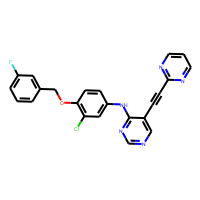
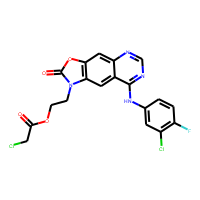

In [36]:
# Iterate over all the smiles in the dataframe
# and apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['Processed_canonical_smiles'].iloc[i])
    sklearnOHC = sklearn_OneHotEncode(canonical_char)
    df['sklearn_OneHotEncoded_WP'].iloc[i] = sklearnOHC.transpose()
end = timer()
df.head(2) # NBVAL_CHECK_OUTPUT

In [37]:
# Print time required for execution
sklearn_time_withoutPadding = end - start
print(str(sklearn_time_withoutPadding) + ' secs') # NBVAL_CHECK_OUTPUT

4.0773009999999985 secs


##### Visualization with Matplotlib.imshow() function

In [38]:
# First One Hot Encoded Matrix
First_OneHotEncoded_matrix5 = df.iloc[0]['sklearn_OneHotEncoded_WP']

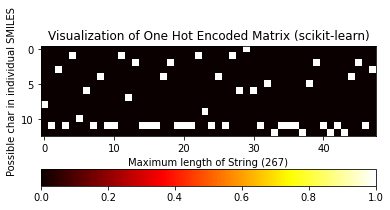

In [39]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_OneHotEncoded_matrix5, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Possible char in individual SMILES')
plt.title('Visualization of One Hot Encoded Matrix (scikit-learn)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [40]:
# Dimension of the OneHotEncoded_matrix
First_OneHotEncoded_matrix5.shape # NBVAL_CHECK_OUTPUT

(13, 48)

It can be confirmed from above visualization that the our One Hot Encoded matrix from sklearn implementation do not have equal dimensions because sklearn Onehot_encoder takes individual strings as their input.

So we thought of making equal dimension of our One Hot Encoded matrix by adding padding to it. It can be either done after One Hot Encoding is performed on the SMILES strings or before One Hot Encoding is performed, after we label encode our SMILES characters.

We will be discussing both the scenarios in next sections.

#### With padding (Equal Dimension)

##### Padding after One Hot Encoding is Perfomed

In [41]:
# Create new column which has OneHotEncoded smiles using sklearn implementation
df['sklearn_OneHotEncoded_later'] = ''

In [42]:
# Defined function to add padding after OneHotEncoding
def laterPadding(matrix):
    """Add horizantle and vertical padding to the given matrix
    Parameters
    ----------
          matrix(ndarray): Character array
    Returns
    -------
          ndarray: return padded matrix
  """
    IndexPadding = np.ndarray(shape=(267-len(matrix),
                                     len(matrix[0])))
    IndexPadding.fill(0)
    ColumnPadding = np.ndarray(shape=(267,
                                      37-len(matrix[0])))
    ColumnPadding.fill(0)
    matrix = np.append(matrix, IndexPadding, axis=0)
    matrix = np.append(matrix, ColumnPadding, axis=1)
    return matrix

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

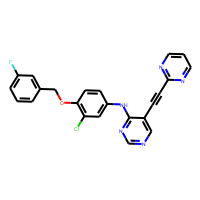
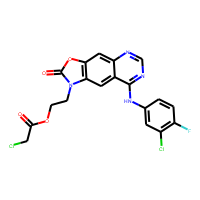

In [43]:
# Iterate over all the smiles in the dataframe
# and apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['Processed_canonical_smiles'].iloc[i])
    sklearnOHC = sklearn_OneHotEncode(canonical_char)
    sklearnOHCPadding = laterPadding(sklearnOHC)
    df['sklearn_OneHotEncoded_later'].iloc[i] = sklearnOHCPadding.transpose()
end = timer()
df.head(2) # NBVAL_CHECK_OUTPUT

In [44]:
# Print time required for execution
sklearn_time_Later = end - start
print(str(sklearn_time_Later) + ' secs') # NBVAL_CHECK_OUTPUT

5.710535500000002 secs


###### Visualization with Matplotlib.imshow() function 

In [45]:
# First One Hot Encoded Matrix
First_OneHotEncoded_matrix6 = df.iloc[0]['sklearn_OneHotEncoded_later']

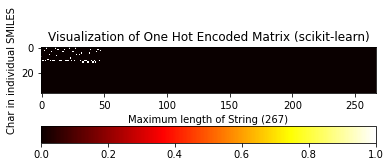

In [46]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_OneHotEncoded_matrix6, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Char in individual SMILES')
plt.title('Visualization of One Hot Encoded Matrix (scikit-learn)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [47]:
# Dimension of the OneHotEncoded_matrix
First_OneHotEncoded_matrix6.shape

(37, 267)

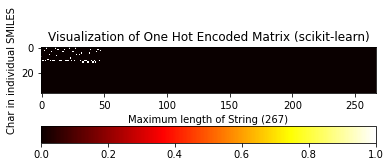

In [48]:
# Another One Hot Encoded Matrix
Two_OneHotEncoded_matrix6 = df.iloc[0]['sklearn_OneHotEncoded_later']
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(Two_OneHotEncoded_matrix6, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Char in individual SMILES')
plt.title('Visualization of One Hot Encoded Matrix (scikit-learn)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [49]:
# Dimension of the OneHotEncoded_matrix
Two_OneHotEncoded_matrix6.shape # NBVAL_CHECK_OUTPUT

(37, 267)

Now we can observe that the dimensions are equal for all the SMILES strings.

##### Padding before One Hot Encoding is Perfomed

In this case we have added padding just after the label encoding or before the One Hot Encoding is performed on SMILES.

In [50]:
# Create new column which has OneHotEncoded smiles using sklearn implementation
df['sklearn_OneHotEncoded_initial'] = ''

In [51]:
# Defined function to add padding before OneHotEncoding
def initialPadding(canonical_char):
    """Add Padding to the given list before One Hot Encoding
       is performed.
    Parameters
    ----------
          canonical_char(array): Character array
    Returns
    -------
          list: return padded character list
    """
    zeroes = [0] * (267-len(canonical_char))
    list1 = canonical_char + zeroes
    return list1

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."

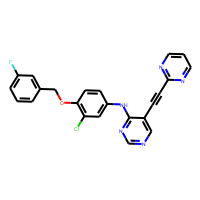
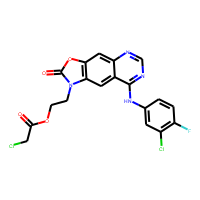

In [52]:
# Iterate over all the SMILES in the dataframe and
# apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['Processed_canonical_smiles'].iloc[i])
    canonical_charPadded = initialPadding(canonical_char)
    sklearnOHC = sklearn_OneHotEncode(canonical_charPadded)
    ColumnPadding = np.ndarray(shape=(267,
                                      37-len(sklearnOHC[0])))
    ColumnPadding.fill(0)
    sklearnOHC = np.append(sklearnOHC, ColumnPadding, axis=1)
    df['sklearn_OneHotEncoded_initial'].iloc[i] = sklearnOHC.transpose()
end = timer()
df.head(2) # NBVAL_CHECK_OUTPUT

In [53]:
# Print time required for execution
sklearn_time_initial = end - start
print(str(sklearn_time_initial) + ' secs') # NBVAL_CHECK_OUTPUT

6.246648200000003 secs


###### Visualization with Matplotlib.imshow() function 

In [54]:
# First One Hot Encoded Matrix
First_OneHotEncoded_matrix7 = df['sklearn_OneHotEncoded_initial'].iloc[0]

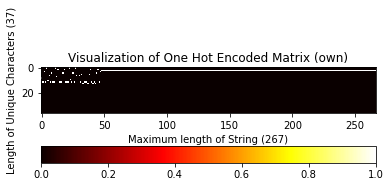

In [55]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_OneHotEncoded_matrix7, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Length of Unique Characters (37)')
plt.title('Visualization of One Hot Encoded Matrix (own)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [56]:
# Dimension of the OneHotEncoded_matrix
First_OneHotEncoded_matrix7.shape # NBVAL_CHECK_OUTPUT

(37, 267)

### Apply One Hot encoding using implementation in Keras

Keras is also a very powerful and highly used library mainly for deep-learning tasks. 
There may be a case where we have sequences or strings that are already integer encoded, then in that case we can use function called [to_categorical()](https://keras.io/api/utils/) provide by keras library to one hot encode integer data directly, but it always should be integer which may not have a real ordinal relationship and are really just placeholders for labels.

In [57]:
# Use keras implementation of One Hot Encoding
def keras_OneHotEncode(canonical_char):
    """
    Function to one hot encode the smiles using keras
    implementation
    Parameters
    ----------
         canonical_char(array): Canonical character array
    Returns
    -------
         ndarray: return one hot encoded matrix
    """
    # integer encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(canonical_char)
    # one hot encode
    encoded = to_categorical(integer_encoded)
    return encoded

#### Without Padding (unequal dimension)

In [58]:
# Create new column which has OneHotEncoded smiles using keras implementation
df['keras_OneHotEncoded'] = ''

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial,keras_OneHotEncoded
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."

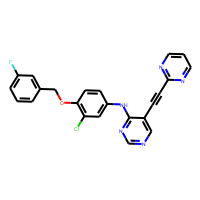
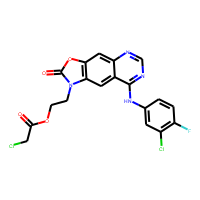
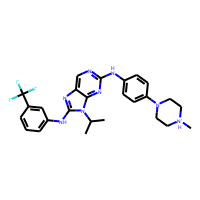
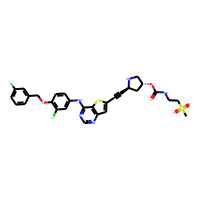
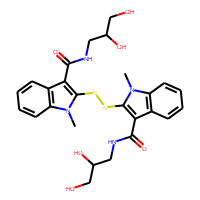

In [59]:
# for loop to iterate over all the smiles in the
# dataframe and apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['canonical_smiles'].iloc[i])
    kerasOHC = keras_OneHotEncode(canonical_char)
    df['keras_OneHotEncoded'].iloc[i] = kerasOHC.transpose()
end = timer()
df.head() # NBVAL_CHECK_OUTPUT

In [60]:
# Print time required for execution
keras_time = end - start
print(str(keras_time) + ' secs') # NBVAL_CHECK_OUTPUT

2.785696300000005 secs


##### Visualization with Matplotlib.imshow() function 

In [61]:
# First One Hot Encoded Matrix
First_OneHotEncoded_matrix8 = df.iloc[0]['keras_OneHotEncoded']

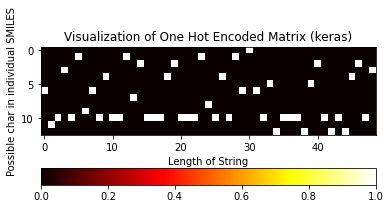

In [62]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_OneHotEncoded_matrix8, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Length of String')
plt.ylabel('Possible char in individual SMILES')
plt.title('Visualization of One Hot Encoded Matrix (keras)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [63]:
# Dimension of the OneHotEncoded_matrix
First_OneHotEncoded_matrix8.shape # NBVAL_CHECK_OUTPUT

(13, 49)

#### With padding (equal dimension)

In [64]:
# Create new column which has OneHotEncoded smiles using keras implementation
df['keras_OneHotEncoded_padding'] = ''

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial,keras_OneHotEncoded,keras_OneHotEncoded_padding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."

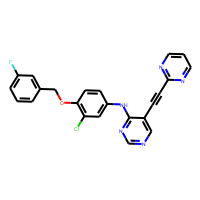
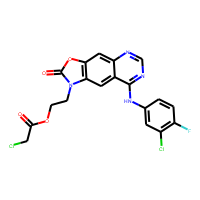
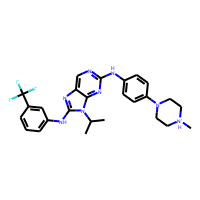
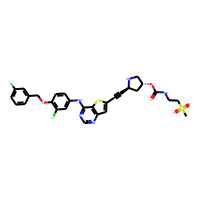
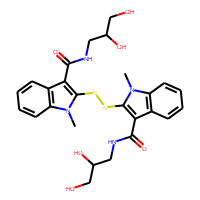

In [65]:
# for loop to iterate over all the smiles in the
# dataframe and apply the  function
start = timer()
for i in range(0, 3906):
    canonical_char = split(df['canonical_smiles'].iloc[i])
    kerasOHC = keras_OneHotEncode(canonical_char)
    kerasOHCPadding = laterPadding(kerasOHC)
    df['keras_OneHotEncoded_padding'].iloc[i] = kerasOHCPadding.transpose()
end = timer()
df.head() # NBVAL_CHECK_OUTPUT

In [66]:
# Print time required for execution
keras_time_WP = end - start
print(str(keras_time_WP) + ' secs') # NBVAL_CHECK_OUTPUT

3.3988212000000004 secs


##### Visualization with Matplotlib.imshow() function

In [67]:
# First One Hot Encoded Matrix
First_OneHotEncoded_matrix9 = df.iloc[0]['keras_OneHotEncoded_padding']

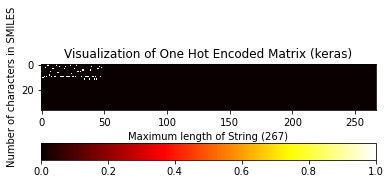

In [68]:
# Visualization of One Hot Encoded array using matplotlib imshow()
im = plt.imshow(First_OneHotEncoded_matrix9, cmap='hot', interpolation='None')
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Maximum length of String (267)')
plt.ylabel('Number of characters in SMILES')
plt.title('Visualization of One Hot Encoded Matrix (keras)')
# plt.axis('auto')
plt.show() # NBVAL_CHECK_OUTPUT

In [69]:
# Dimension
First_OneHotEncoded_matrix9.shape # TODO:CI

(37, 267)

,chembl_id,IC50,units,canonical_smiles,pIC50\r,2D_Figures,Own_OneHotEncoding,UniqueChar_OneHotEncoding,Processed_canonical_smiles,sklearn_OneHotEncoded_WP,sklearn_OneHotEncoded_later,sklearn_OneHotEncoded_initial,keras_OneHotEncoded,keras_OneHotEncoded_padding
1777,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5785,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
6373,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
2442,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",Lc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2N...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1084,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531,,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,..."

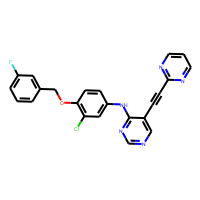
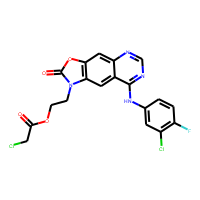
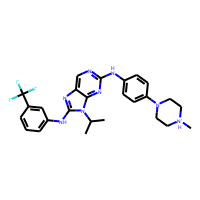
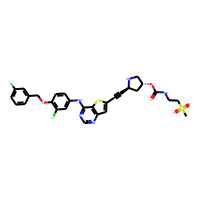
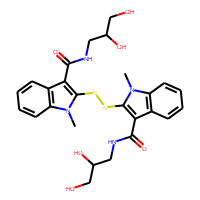

In [70]:
# Final dataframe with all the OHE matrices
df.head() # NBVAL_CHECK_OUTPUT

## Discussion 

As we can notice from my above implementations, the execution time varies with different implementations, 

- **Unequal Dimension** (when no padding was performed)
    - Unexpectedly, our own 'smiles_encoder' function worked the best with 0.89 sec execution time followed by 'Keras' implementation with 1.48 sec and One Hot Encoding with 'Scikit-learn' implementation executed with 2.42 secs, the highest.  But since we have different dimensions then it won't be much useful for our Machine Learning Models.
    
- **Equal Dimension** (when padding was performed)
    - Surprisingly, even after creating equal dimensions (adding padding), my own functions 'PreprocessingData' along with 'smiles_encoder' again outperformed the other two implementations with execution time of 1.02 secs whereas sklearn required approximately 3.0 secs and keras 1.85 secs. In my opinion, it happened because of additional padding performed on the strings.
    

I would also like to draw your attention for the time execution difference in Scikit-learn Implementation when Padding performed

- **Before One Hot Encoding** : Time required was 3.0 secs approx.

- **After One Hot Encoding** : Time required was 2.7 secs approx.

One possible reason of this time difference could be, if we perform padding after the label encoding, then we will be having more characters to one hot encode as compared to just add padding after one encoded is accomplished.

**Note:** Execution Timings might differ depending upon the environment used.

### Challenges 

There were several challenges faced during the task, for instance:

- Making equal dimensions of the One Hot Encoding Matrix.

- Replacing two letter elements with unique characters.

- After searching for 2 letter elements, we found a specific element `Sc` which is a metallic element, but in our dataset both 'S' and 'c' are present individually as well. So if we would have replaced 'Sc' with single letter element then it might have affected our actual strings. So we assumed that since Sc is a metallic element so it won't be present in SMILES, we did not replace this element.

### Quiz

- Why is it required to have equal dimensions of the One Hot Encoded matrix ?
- ?